<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/HMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
file_name = '/content/drive/MyDrive/Data/Heavy Metals Saint Martin.xlsx'
PPM_df = pd.read_excel(file_name, sheet_name='HMC (SED)')
PPB_df = pd.read_excel(file_name, sheet_name='HMC (Water)')

In [ ]:
Stat_df = pd.read_excel(file_name, sheet_name='SA')
print (Stat_df)

        Elements (PPB)        As         Pb  Cd        Hg          Ni  \
0                St 01  1.170000   9.750000   1  0.104750   44.333330   
1                St 02  1.495000   9.850000   1  0.112850   78.666670   
2                St 03  1.210000  16.650000   1  0.098350   94.333330   
3                St 04  1.960000  17.450000   1  0.121750   73.666670   
4                St 05  1.725000  26.150000   1  0.203350  154.333300   
5                St 06  1.890000   8.150000   1  0.162150   89.333330   
6                St 07  1.790000   7.050000   1  0.242750   78.666670   
7                St 08  1.835000  14.250000   1  0.311650   93.666670   
8                St 09  1.720000  11.150000   1  0.356550  107.000000   
9                St 10  1.420000  12.760000   1  0.340350   78.110000   
10             Average  1.621500  13.320920   1  0.205450   89.210700   
11             Minimum  1.170000   7.050000   1  0.098350   44.333330   
12             Maximum  1.960000  26.150000   1  0.

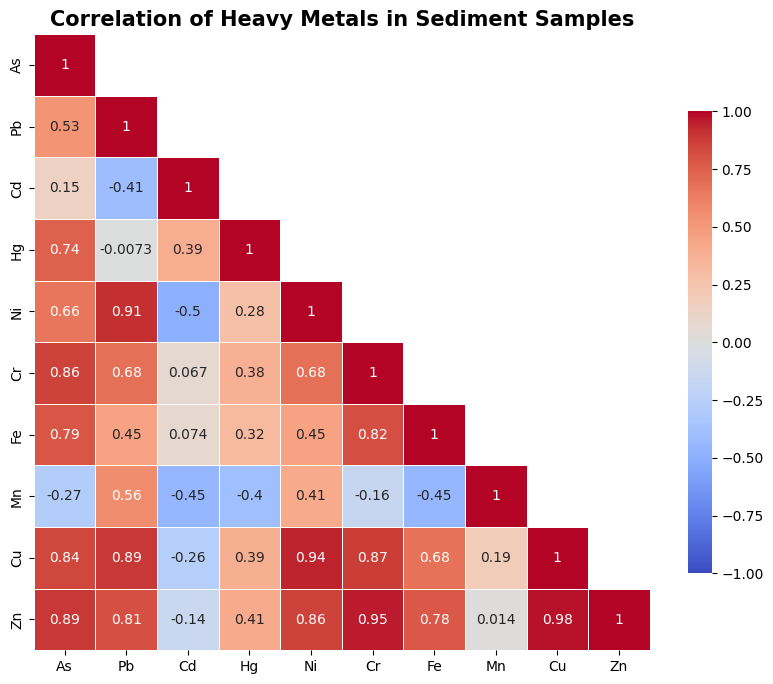

In [ ]:
# Select relevant columns for correlation
heavy_metals = ['As', 'Pb', 'Cd', 'Hg', 'Ni', 'Cr', 'Fe', 'Mn', 'Cu', 'Zn']

# Calculate Pearson correlation
corr = PPM_df[heavy_metals].corr()

# Generate a mask for the upper triangle (exclude diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with circular markers (no values)
sns.heatmap(corr, mask=mask, cmap='coolwarm', cbar=True, square=True,
            linewidths=0.5, annot=True, vmin=-1, vmax=1,
            cbar_kws={"shrink": .75})

# Set plot title
plt.title('Correlation of Heavy Metals in Sediment Samples',
          fontweight='bold',
          fontsize=15,
          loc='center')

# Show the plot
plt.show()

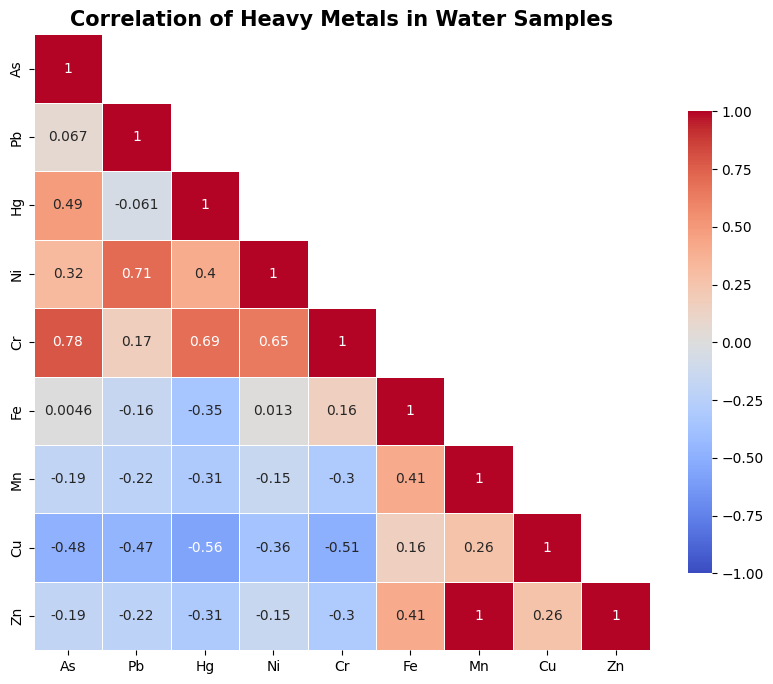

In [ ]:
# Select relevant columns for correlation
heavy_metals = ['As', 'Pb', 'Hg', 'Ni', 'Cr', 'Fe', 'Mn', 'Cu', 'Zn']

# Calculate Pearson correlation
corr = PPB_df[heavy_metals].corr()

# Generate a mask for the upper triangle (exclude diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with circular markers (no values)
sns.heatmap(corr, mask=mask, cmap='coolwarm', cbar=True, square=True,
            linewidths=0.5, annot=True, vmin=-1, vmax=1,
            cbar_kws={"shrink": .75})


# Set plot title
plt.title('Correlation of Heavy Metals in Water Samples',
          fontweight='bold',
          fontsize=15,
          loc='center')

# Show the plot
plt.show()

In [ ]:
# Sample data for sediment heavy metal concentration (PPM)
PPM_data = {
    'Station': ['St 01', 'St 02', 'St 03', 'St 04', 'St 07', 'St 08', 'St 09'],
    'As (PPM)': [0.0675, 2.3015, 1.7600, 1.9095, 0.1100, 1.8475, 1.7030],
    'Pb (PPM)': [22.775, 28.525, 28.225, 23.825, 18.175, 20.875, 19.225],
    'Cd (PPM)': [0.175, 0.125, 0.002, 0.002, 0.002, 0.002, 5.725],
    'Hg (PPM)': [0.02920, 0.07260, 0.03300, 0.08200, 0.03570, 0.06575, 0.07720],
    'Ni (PPM)': [54.475, 132.1297, 103.08333, 106.41667, 36.41667, 66.08333, 32.25],
    'Cr (PPM)': [14.125, 48.875, 58.725, 42.025, 21.275, 34.625, 39.825],
    'Fe (PPM)': [30.16, 64.36087, 65.445212, 42.629468, 42.168994, 62.637806, 54.304712],
    'Mn (PPM)': [806.0, 691.0, 659.0, 661.5, 566.0, 511.0, 516.5],
    'Cu (PPM)': [8.55, 22.85, 20.65, 18.15, 6.2, 14.05, 10.8],
    'Zn (PPM)': [27.7, 84.9, 87.0, 70.3, 28.2, 58.3, 50.9]
}

# Sample data for water heavy metal concentration (PPB)
PPB_data = {
    'Station': ['St 01', 'St 02', 'St 03', 'St 04', 'St 05', 'St 06', 'St 07', 'St 08', 'St 09'],
    'As (PPB)': [1.170, 1.495, 1.210, 1.960, 1.725, 1.890, 1.790, 1.835, 1.720],
    'Pb (PPB)': [9.75, 9.85, 16.65, 17.45, 26.15, 8.15, 7.05, 14.25, 11.15],
    'Cd (PPB)': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Hg (PPB)': [0.10475, 0.11285, 0.09835, 0.12175, 0.20335, 0.16215, 0.24275, 0.31165, 0.35655],
    'Ni (PPB)': [44.33333, 78.66667, 94.33333, 73.66667, 154.3333, 89.33333, 78.66667, 93.66667, 107.0],
    'Cr (PPB)': [97, 127, 133, 142, 163, 157, 169, 162, 158],
    'Fe (PPB)': [30160, 64360.87, 65445.212, 42629.468, 42168.994, 62637.806, 54304.712, 51672.43743, 30160],
    'Mn (PPB)': [5, 130, 5, 5, 5, 5, 5, 5, 5],
    'Cu (PPB)': [23, 22, 21, 19, 20, 23, 21, 17, 20],
    'Zn (PPB)': [8, 10, 8, 8, 8, 8, 8, 8, 8]
}

In [ ]:
# Converting PPM values to PPB by multiplying the sediment concentration (PPM) columns by 1000
PPM_df_converted = PPM_df.copy()
for col in PPM_df.columns[1:]:  # Skip 'Station' column
    PPM_df_converted[col] = PPM_df_converted[col] * 1000

# Merging converted PPM (now in PPB) with the water PPB data based on 'Station'
merged_converted_df = pd.merge(PPM_df_converted, PPB_df, on='Station')

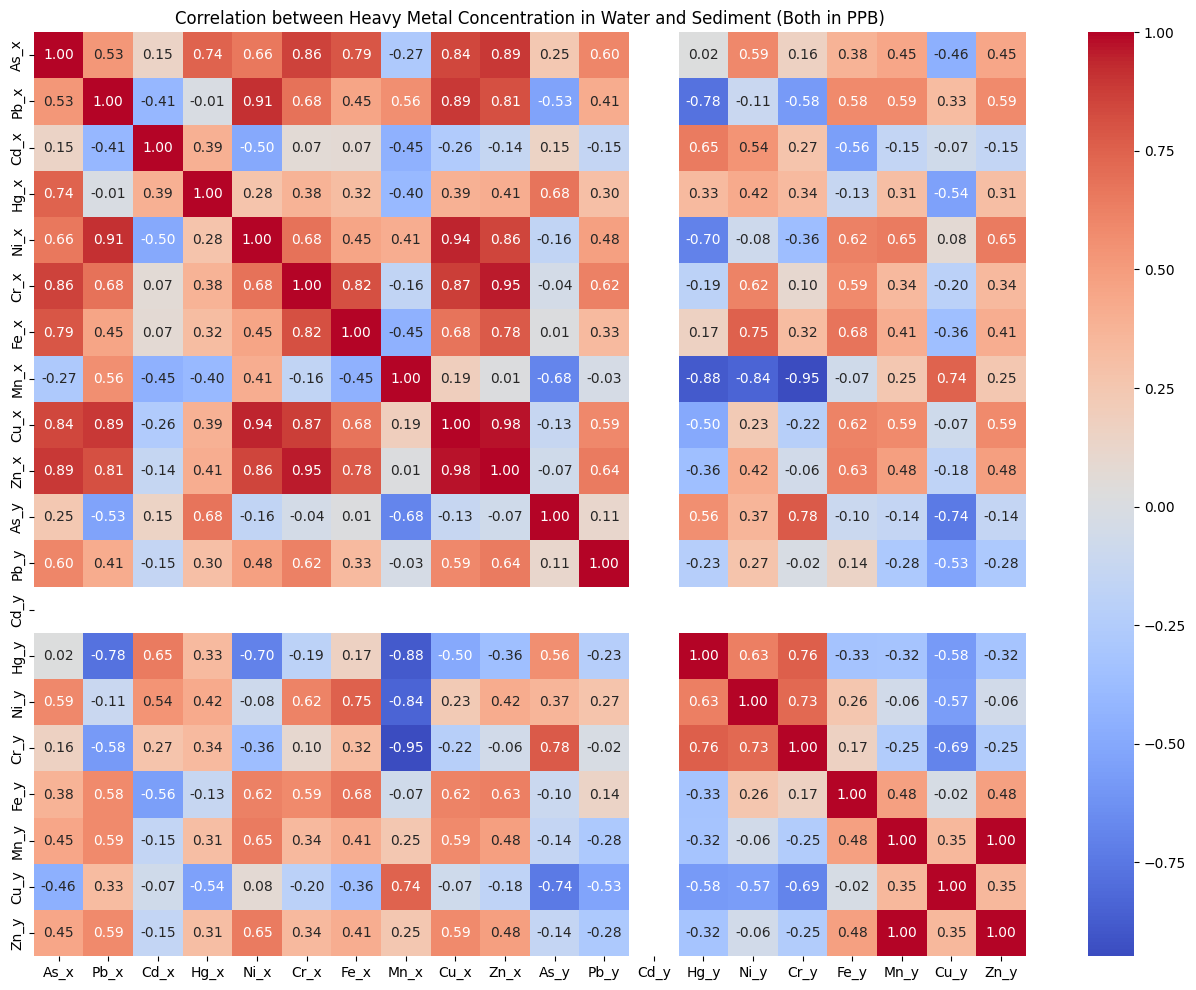

In [ ]:
# Exclude 'Station' column from correlation calculation to avoid non-numeric data issues
correlation_converted_fixed = merged_converted_df.drop(columns=["Station"]).corr()
mask = np.triu(np.ones_like(correlation_converted_fixed, dtype=bool), k=1)

# Plot the correlation heatmap again
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_converted_fixed, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation between Heavy Metal Concentration in Water and Sediment (Both in PPB)")
plt.show()

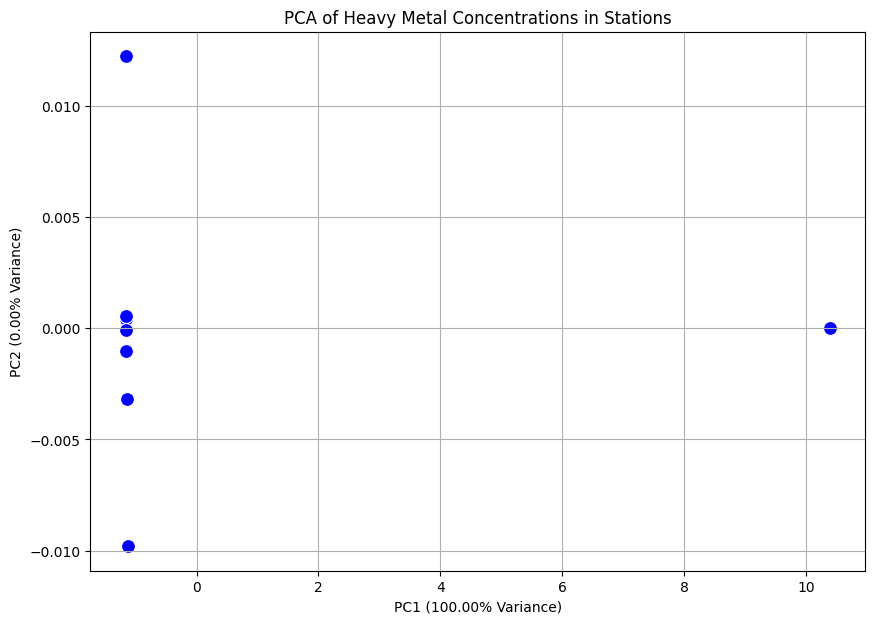

In [ ]:
# Filter rows for the individual stations only
stations_df = Stat_df[Stat_df['Elements (PPB)'].str.contains('St')]

# Set station names as the index (optional)
stations_df = stations_df.set_index('Elements (PPB)')

# Transpose the dataframe to have elements as columns and stations as rows
transposed_data = stations_df.transpose()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df.index = transposed_data.index  # Set station names as index

# Plotting the PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, color='blue')

# Adding labels and title
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}% Variance)')
plt.title('PCA of Heavy Metal Concentrations in Stations')
plt.grid()
plt.show()